In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Прочитайте файл
df = pd.read_csv("2017_jun_final.csv")

In [2]:
# 2. Прочитайте отриману таблицю
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [3]:
# 3. Визначте розмір таблиці
print(df.shape)

(8704, 25)


In [4]:
# 4. Визначте типи всіх стовпців
print(df.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [5]:
# 5. Порахуйте, яка частка пропусків міститься в кожній колонці
print(df.isnull().sum() / len(df))

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [6]:
# 6. Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
columns_to_drop = df.columns[df.isnull().sum() > 0].tolist()
columns_to_drop.remove("Язык.программирования")
print(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())

['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls']
   N                 Должность Язык.программирования Общий.опыт.работы  \
0  1        Junior QA engineer                   NaN               0.5   
1  2        Junior QA engineer                   NaN  меньше 3 месяцев   
2  3         Software Engineer               C#/.NET                 4   
3  4         Software Engineer            JavaScript                 5   
4  5  Senior Software Engineer            JavaScript    10 и более лет   

  Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0                          0.5               400   
1             меньше 3 месяцев               430   
2                            1              2500   
3                            4              2000   
4                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  \
0                                 0  Харьков       до 10 человек   
1                               13

In [7]:
# 7. Перевірка частки пропусків після видалення
print(df.isnull().sum() / len(df))

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


In [8]:
# 8. Видаліть усі рядки з пропусками
df.dropna(inplace=True)

In [9]:
# 9. Новий розмір таблиці
print(df.shape)

(4854, 20)


In [10]:
# 10. Створіть нову таблицю python_data
python_data = df[df["Язык.программирования"] == "Python"]
# print(len(python_data))

In [11]:
# 11. Розмір таблиці python_data
print(python_data.shape)

(207, 20)


In [12]:
# 12. Групування за стовпчиком "Посада"
grouped = python_data.groupby("Должность")

In [13]:
# 13. Агрегація даних за "Зарплата.в.місяць"
salary_stats = grouped["Зарплата.в.месяц"].agg(["min", "max"])
print(salary_stats)

                           min   max
Должность                           
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [14]:
# 14. Функція для обчислення середньої зарплати
def fill_avg_salary(row):
    return (row["min"] + row["max"]) / 2

In [15]:
# 15. Створення нового стовпчика "avg"
salary_stats["avg"] = salary_stats.apply(fill_avg_salary, axis=1)
print(salary_stats)

                           min   max     avg
Должность                                   
Junior Software Engineer   100  1250   675.0
Senior Software Engineer  1300  9200  5250.0
Software Engineer          500  5400  2950.0
System Architect          3000  5000  4000.0
Technical Lead            1425  6200  3812.5


In [16]:
# 16. Описова статистика для нового стовпчика
print(salary_stats["avg"].describe())

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [17]:
# 17. Збереження отриманої таблиці в CSV файл
salary_stats.to_csv("salary_stats.csv")

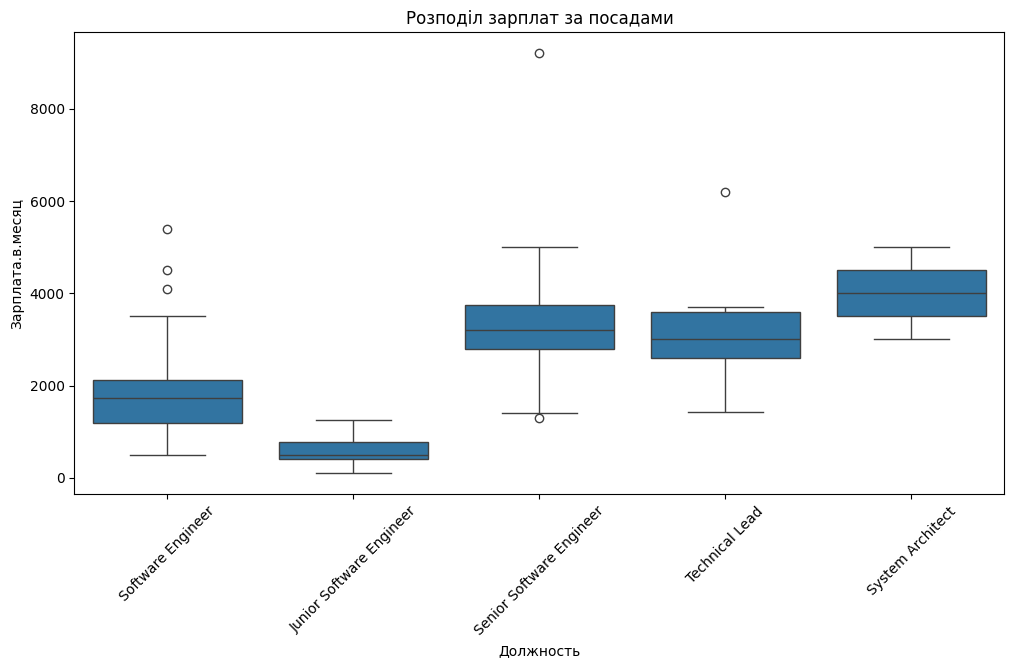

In [23]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=python_data, x="Должность", y="Зарплата.в.месяц")
plt.title("Розподіл зарплат за посадами")
plt.xticks(rotation=45)
plt.show()

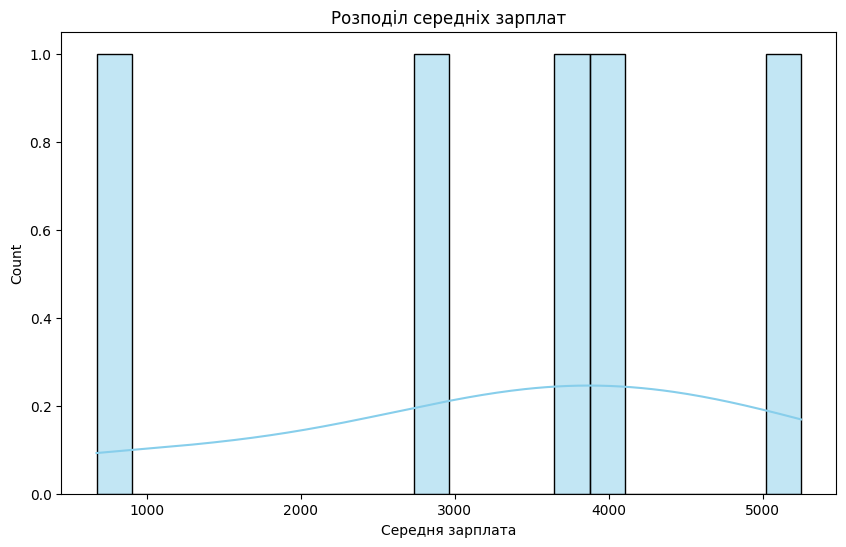

In [38]:
# Гістограма (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(salary_stats['avg'], kde=True, bins=20, color="skyblue", edgecolor="black")
plt.title("Розподіл середніх зарплат")
plt.xlabel("Середня зарплата")
plt.show()

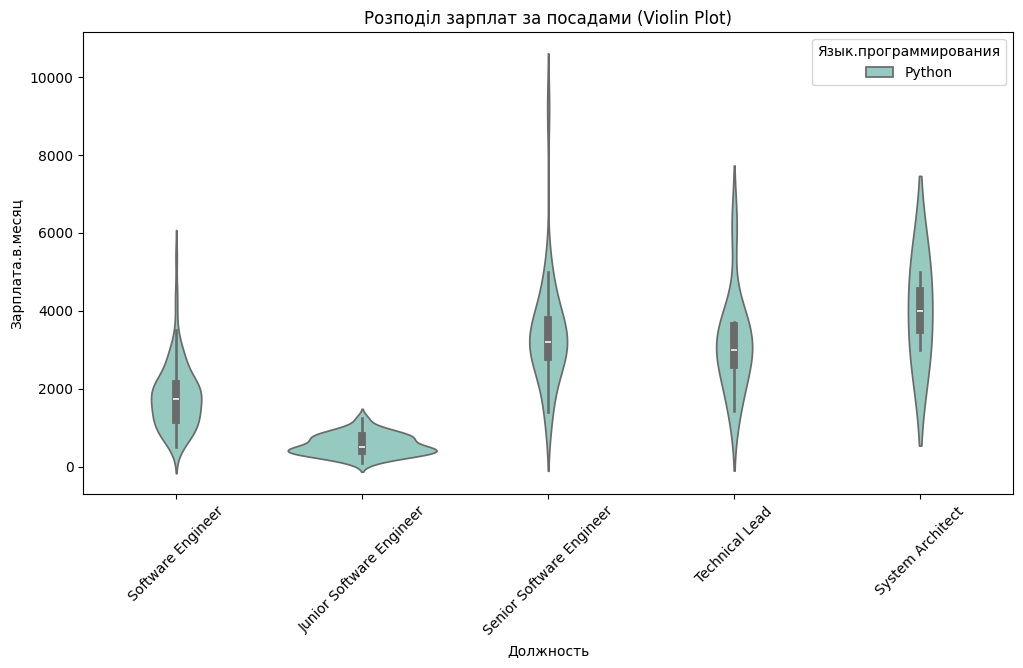

In [41]:
# Віолончелевий графік (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(data=python_data, x="Должность", y="Зарплата.в.месяц", hue="Язык.программирования", palette="Set3")
plt.title("Розподіл зарплат за посадами (Violin Plot)")
plt.xticks(rotation=45)
plt.show()